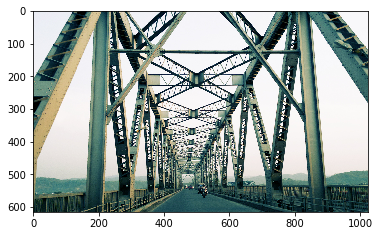

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('bridge.jpg'))
plt.imshow(img, interpolation='nearest')

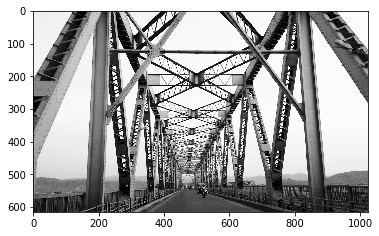

In [3]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

plt.imshow(gray, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

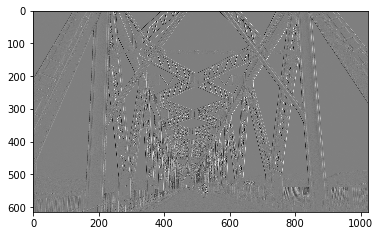

In [4]:
# vertical Edge Detection

kernel = np.array([-1, 1])
vertEdge = np.zeros((gray.shape[0], gray.shape[1]-1))

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]-1):
        vertEdge[i][j] = gray[i, j:j+2].dot(kernel.T)

plt.imshow(vertEdge, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

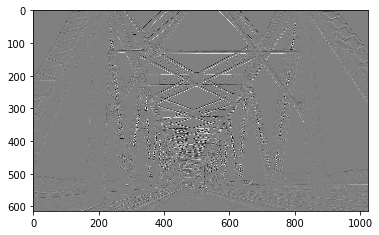

In [5]:
# Horizontal Edge Detection

kernel = np.array([-1, 1])
horEdge = np.zeros((gray.shape[0]-1, gray.shape[1]))

for i in range(gray.shape[0]-1):
    for j in range(gray.shape[1]):
        horEdge[i][j] = gray[i:i+2, j].dot(kernel)

plt.imshow(horEdge, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

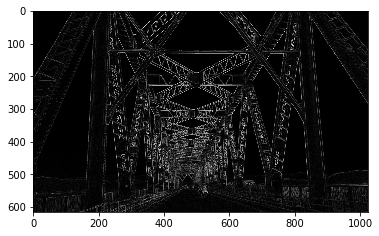

In [8]:
# Complete Edge Detection

vertEdge = np.c_[vertEdge, np.zeros((615, 1))]
horEdge = np.r_[horEdge, np.zeros((1, 1024))]
edge = np.sqrt(np.square(horEdge)+np.square(vertEdge))
plt.imshow(edge, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

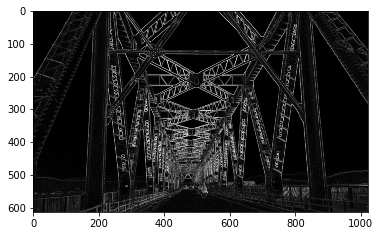

In [9]:
# Gaussian Blur on above image

gaussian_kernel = np.array([[1/16, 1/8, 1/16], 
                           [1/8, 1/4, 1/8],
                           [1/16, 1/4, 1/16]])

blurred_img = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        blurred_img[i][j] = np.sum(np.multiply(edge[i:i+3, j:j+3], gaussian_kernel))

plt.imshow(blurred_img, interpolation='nearest', cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
## Clear and Better